WeatherPy
----


In [3]:
# Import Dependencies. 
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

import requests

import time

from scipy.stats import linregress

from pprint import pprint

from datetime import datetime

# Import API key from .py file.

from api_keys import api_key

# Use citipy to determine location of each city.

from citipy import citipy

# Load cities.csv from output_data file.

output_data_file = "output_data/cities.csv"

## Generate Cities List

In [4]:
# Input range of latitudes and longitudes - Latitude going up to 90 and Longitude going up to 180.

lat_range = (-90, 90)

lng_range = (-180, 180)

# Create empty lists for cities, countries, latitude, and longitude.

cities = []

countries = []

latitude_longitude = []


# Create random number generator for 500+ cities.

lats = np.random.uniform(low=-90.000, high=90.000, size=1200)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)

latitude_longitude = zip(lats, lngs)

# Calculate the nearest city from the random number that is generated.

for latitudes_longitudes in latitude_longitude:

    city = citipy.nearest_city(latitudes_longitudes[0], latitudes_longitudes[1]).city_name
    
    country = citipy.nearest_city(latitudes_longitudes[0], latitudes_longitudes[1]).country_code
    
    # If the city is unique, then append it to a our cities list. Then append the country that city is in.
    
    if city not in cities:
    
        cities.append(city)
        
        countries.append(country)
        
# Combine the city and country lists to output a complete location.

city_country_list = zip(cities,countries)

# Print out cities.

print(len(cities)) 

536


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Add URL and establish units (Metric).

url = "http://api.openweathermap.org/data/2.5/weather?"

units = "metric"

# Create empty lists to hold all needed information.

date = []
temperature = []
humidity = []
wind_speed = []
cloudiness = []
lat = []
lng = []
city_number = []
city_name = []
country = []

# Open files to print results of the API calls - log and csv.

the_print_log = open("weather_log.txt", "w")

csv_data = open("weather_data.csv","w")

# Write header for csv. 

csv_data.write("date,city_number,city_name,country,lat,lng,temperature,cloudiness,wind_speed,humidity\n")

# Loop through data for city information.

for city,country_code in city_country_list:
    
    query_url = f"{url}appid={api_key}&q={city},{country_code}&{units}"
    
    response = requests.get(query_url).json()
    
    # Try finding the temperature, humidity, wind speed, and cloudiness within the API.
    
    try:
        
        time = (datetime.fromtimestamp(response["dt"])).strftime("%m/%d/%y")
        
        temps = response["main"]["temp"]
        
        humid = response["main"]["humidity"]
        
        wind = response["clouds"]["all"]
        
        cloud = response["wind"]["speed"]
        
        lat_value = response["coord"]["lat"]
        
        lng_value = response["coord"]["lon"]
        
        city_value = int(response["id"])
        
        city_names = response["name"]
        
        country_name = response["sys"]["country"]
        
        # Append information above to lists.
        
        date.append(time)
        temperature.append(temps)
        humidity.append(humid)
        wind_speed.append(wind)
        cloudiness.append(cloud)
        lat.append(lat_value)
        lng.append(lng_value)
        city_number.append(city_value)
        city_name.append(city_names)
        country.append(country_name)
        
        # Print data to text file. 
        
        print(f"{city_names} is in the Weathermap API\n")
        the_print_log.write(f"{city_names} is in the Weathermap API\n")
        
    # except to finish the try statement
    except:
        
        #Print data to csv file - date,city_number,city_name,country,lat,lng,temperature,cloudiness,wind_speed,humidity.
        
        csv_data.write(f"{time},{city_value},{city_names},{country_name},{lat_value},{lng_value},{temps},{cloud},{wind},{humid}\n")
        
        # Append null values.
        
        date.append(None)
        temperature.append(None)
        humidity.append(None)
        wind_speed.append(None)
        cloudiness.append(None)
        lat.append(None)
        lng.append(None)
        city_number.append(None)
        city_name.append(None)
        country.append(None)
        pass
    
# Close the file handle after completion of the loop
the_print_log.close()
csv_data.close()
        

Yendi is in the Weathermap API

Port Alfred is in the Weathermap API

Traverse City is in the Weathermap API

Huarmey is in the Weathermap API

Muli is in the Weathermap API

Kherālu is in the Weathermap API

Faanui is in the Weathermap API

Guerrero Negro is in the Weathermap API

Liusha is in the Weathermap API

Norman Wells is in the Weathermap API

Bac Lieu is in the Weathermap API

Bragança is in the Weathermap API

Severo-Kuril'sk is in the Weathermap API

Meulaboh is in the Weathermap API

Hermanus is in the Weathermap API

Olafsvik is in the Weathermap API

Khatanga is in the Weathermap API

Hilo is in the Weathermap API

Yellowknife is in the Weathermap API

Ballina is in the Weathermap API

Brus is in the Weathermap API

Port Elizabeth is in the Weathermap API

Saint George is in the Weathermap API

Atbasar is in the Weathermap API

Rikitea is in the Weathermap API

Longyearbyen is in the Weathermap API

Albany is in the Weathermap API

Mossamedes is in the Weathermap API

Du

Mount Gambier is in the Weathermap API

Castro is in the Weathermap API

Juegang is in the Weathermap API

Charters Towers is in the Weathermap API

Mandalgovi is in the Weathermap API

Poronaysk is in the Weathermap API

Santarém is in the Weathermap API

Ternate is in the Weathermap API

Coquimbo is in the Weathermap API

Todos Santos is in the Weathermap API

Fairbanks is in the Weathermap API

Portland is in the Weathermap API

Thanh Hoa is in the Weathermap API

Cayenne is in the Weathermap API

Oriximiná is in the Weathermap API

Bambous Virieux is in the Weathermap API

Duncan is in the Weathermap API

Shelburne is in the Weathermap API

Narsaq is in the Weathermap API

Pervomayskiy is in the Weathermap API

Talaya is in the Weathermap API

Kudahuvadhoo is in the Weathermap API

Souillac is in the Weathermap API

Iisalmi is in the Weathermap API

Touros is in the Weathermap API

Celestún is in the Weathermap API

Vokhtoga is in the Weathermap API

Robertson is in the Weathermap 

Port Macquarie is in the Weathermap API

Linxia Chengguanzhen is in the Weathermap API

Berlevåg is in the Weathermap API

Benguela is in the Weathermap API

Bakau is in the Weathermap API

Trairi is in the Weathermap API

Iskateley is in the Weathermap API

Boshkengash is in the Weathermap API

Monywa is in the Weathermap API

Moosomin is in the Weathermap API

Paamiut is in the Weathermap API

Três Lagoas is in the Weathermap API

Saint-Joseph is in the Weathermap API

Oxford is in the Weathermap API



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a dictionary from the lists.
weather_dictionary = {
    "city_id": city_number,
    "city_name": city_name,
    "country": country,
    "latitude": lat,
    "longitude": lng,
    "weather_date": date,
    "temp": temperature,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed
}

# Create dataframe from dictionary above.

weather_df = pd.DataFrame(weather_dictionary)

weather_df.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed
0,2293801.0,Yendi,GH,9.44,-0.01,10/02/20,295.99,91.0,0.64,95.0
1,964432.0,Port Alfred,ZA,-33.59,26.89,10/02/20,289.55,76.0,10.22,100.0
2,NaN,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN
3,5012495.0,Traverse City,US,44.76,-85.62,10/02/20,280.39,72.0,2.10,75.0
4,3939168.0,Huarmey,PE,-10.07,-78.15,10/02/20,290.16,85.0,3.95,56.0


In [7]:
# Drop all NA values (so linear regression can be done later).

# First drop the Na values.

clean_weather_df = weather_df.dropna()

# Reset the index

clean_weather_data = clean_weather_df.reset_index(drop=True)

# Change the datatype for the city_id field to an integer

clean_weather_data['city_id'] = clean_weather_data['city_id'].astype(int)

clean_weather_data.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed
0,2293801,Yendi,GH,9.44,-0.01,10/02/20,295.99,91.0,0.64,95.0
1,964432,Port Alfred,ZA,-33.59,26.89,10/02/20,289.55,76.0,10.22,100.0
2,5012495,Traverse City,US,44.76,-85.62,10/02/20,280.39,72.0,2.10,75.0
3,3939168,Huarmey,PE,-10.07,-78.15,10/02/20,290.16,85.0,3.95,56.0
4,1337617,Muli,MV,2.92,73.57,10/02/20,300.41,78.0,5.33,100.0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

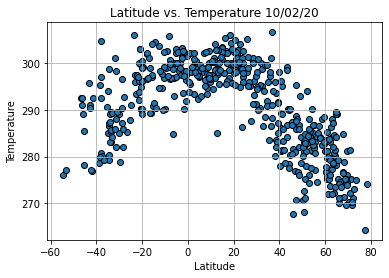

In [10]:
# Build a scatter plot for "Latitude vs. Temperature"
weather_time = clean_weather_data['weather_date'][0]

plt.scatter(clean_weather_data["latitude"], clean_weather_data["temp"], marker="o",edgecolors='black')

# Incorporate the other graph properties

plt.title(f"Latitude vs. Temperature {weather_time}")

plt.ylabel("Temperature")

plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("pngs/LatitudeVsTemperature.png")

plt.show()

# The equator equaling 0, this plot is showing the temperature changes as one moves north and south from the equator. The model is as expected, we are seeing higher temperatures closer to 0 (the equator) and lower as you move towards the poles. 

## Latitude vs. Humidity Plot

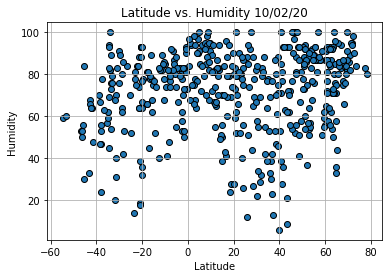

In [11]:
# Build a scatter plot for "Latitude vs. Humidity"

plt.scatter(clean_weather_data["latitude"], clean_weather_data["humidity"], marker="o",edgecolors='black')

# Incorporate the other graph properties

plt.title(f"Latitude vs. Humidity {weather_time}")

plt.ylabel("Humidity")

plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("pngs/LatitudeVsHumidity.png")

plt.show()

# This plot is showing the percent of humidity across different latitudes. The analysis is that humidity level seems to not be impacted by latitude.

## Latitude vs. Cloudiness Plot

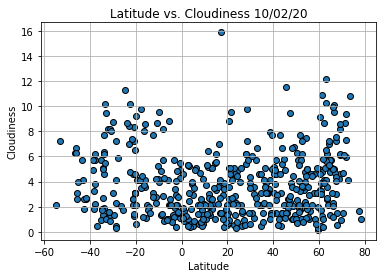

In [12]:
# Build a scatter plot for "Latitude vs. Cloudiness"

plt.scatter(clean_weather_data["latitude"], clean_weather_data["cloudiness"], marker="o",edgecolors='black')

# Incorporate the other graph properties

plt.title(f"Latitude vs. Cloudiness {weather_time}")

plt.ylabel("Cloudiness")

plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("pngs/LatitudeVsCloudiness.png")

plt.show()

# This plot is showing the cloud amount across different cities around the world. The graph shows that latitude does impact cloud level. (Around the -40's and 60's you seem to have a higher level of clouds)

## Latitude vs. Wind Speed Plot

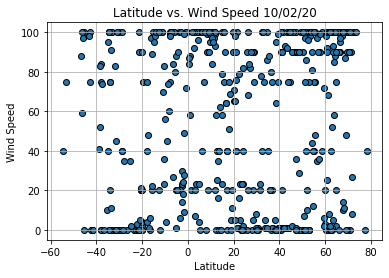

In [13]:
# Build a scatter plot for "Latitude vs. Wind Speed"

plt.scatter(clean_weather_data["latitude"], clean_weather_data["wind_speed"], marker="o",edgecolors='black')

# Incorporate the other graph properties

plt.title(f"Latitude vs. Wind Speed {weather_time}")

plt.ylabel("Wind Speed")

plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("pngs/LatitudeVsWindSpeed.png")

plt.show()

# This plot shows the wind speed of cities around the globe. Latitude does not impact wind speed, it would seem. 

## Linear Regression

In [14]:
# Make a function that accepts a list of x values and y values, creating a linear regression. 
#https://realpython.com/linear-regression-in-python/

# Create a string that determins which hemisphere is being used.

# The x,y coordinates to create the annotation of the equation on the graph.

def make_lin_reg_plot(x_values,y_values,x_desc,y_desc,hemisphere,filename,x_ann,y_ann):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values,edgecolors='black')
    
    plt.plot(x_values,regress_values,"r-")
    
    plt.title(f"{hemisphere}-\nCity {x_desc} vs. {y_desc} {weather_time}")
    
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=12,color="red")
    
    plt.xlabel(x_desc)
    
    plt.ylabel(y_desc)
    
    print(f"The r-squared is: {rvalue}")
    
    print(line_eq)
    
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames.

# Create the north and south hemisphere dataframes using booleans.

north = clean_weather_data.latitude > 0

south = clean_weather_data.latitude < 0

north_weather = clean_weather_data[north]

south_weather = clean_weather_data[south]

# The indexes will not be continuous so they need to be reset with drop=True.

north_weather = north_weather.reset_index(drop=True)

south_weather = south_weather.reset_index(drop=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8433632453063515
y = -0.4x + 304.46


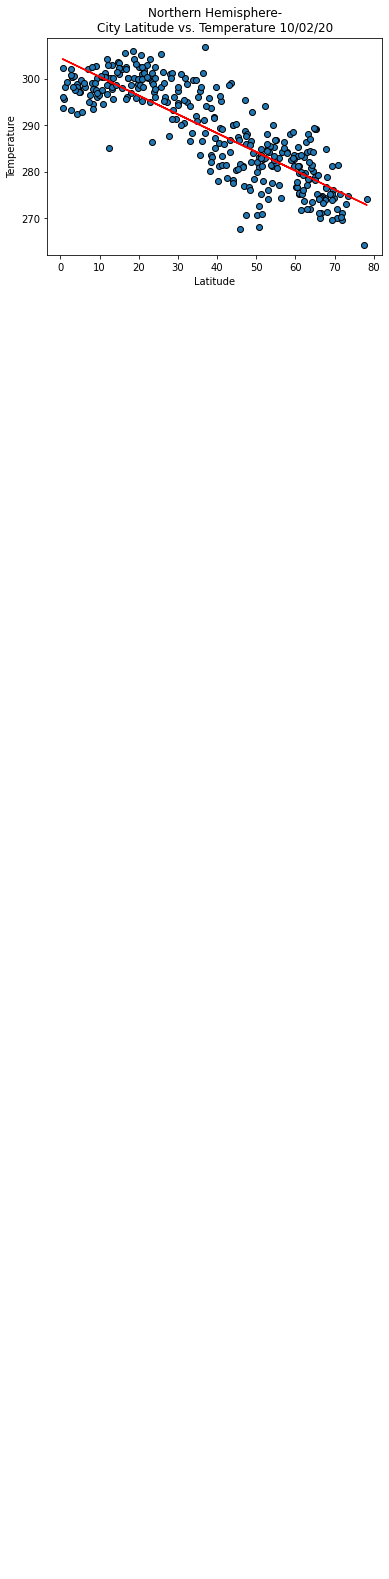

In [20]:
make_lin_reg_plot(north_weather["latitude"],north_weather["temp"],\
                  
                  'Latitude','Temperature','Northern Hemisphere',\
                  
                 'NothernTempLat.png',6,-20)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.643567325595921
y = 0.34x + 300.86


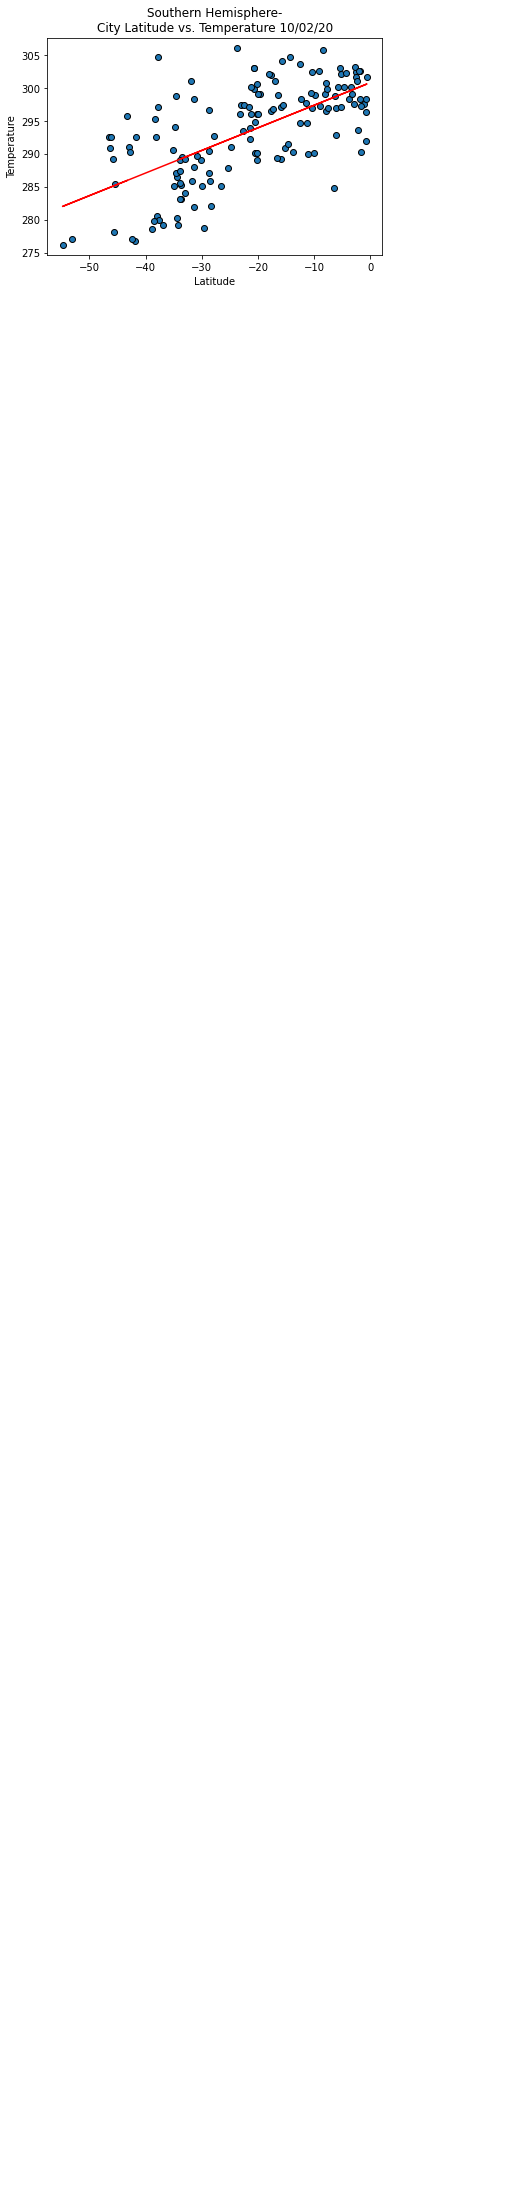

In [21]:
make_lin_reg_plot(south_weather["latitude"],south_weather["temp"],\
                  
                  'Latitude','Temperature','Southern Hemisphere',\
                  
                 'SouthernTempLat.png',6,-20)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06884746741639292
y = 0.06x + 71.69


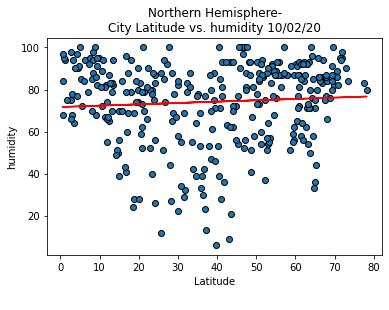

In [22]:
make_lin_reg_plot(north_weather["latitude"],north_weather["humidity"],\
                  
                  'Latitude','humidity','Northern Hemisphere',\
                  
                 'NorthHumidityLat.png',6,-20)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.29977472600822147
y = 0.4x + 77.74


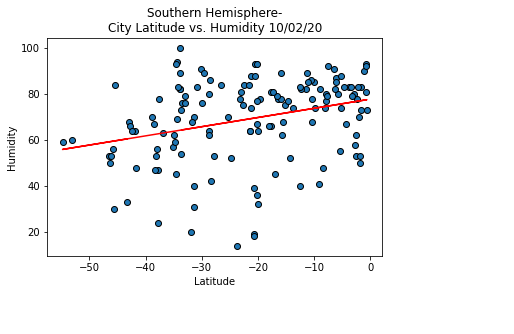

In [23]:
make_lin_reg_plot(south_weather["latitude"],south_weather["humidity"],\
                  
                  'Latitude','Humidity','Southern Hemisphere',\
                  
                 'SouthernHumidityLat.png',6,-20)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2574771096390841
y = 0.03x + 2.41


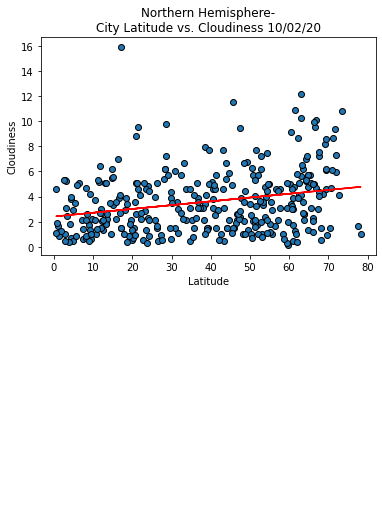

In [24]:
make_lin_reg_plot(north_weather["latitude"],north_weather["cloudiness"],\
                  
                  'Latitude','Cloudiness','Northern Hemisphere',\
                  
                 'NorthernCloudinessLat.png',6,-20)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.1552468417316917
y = -0.03x + 3.39


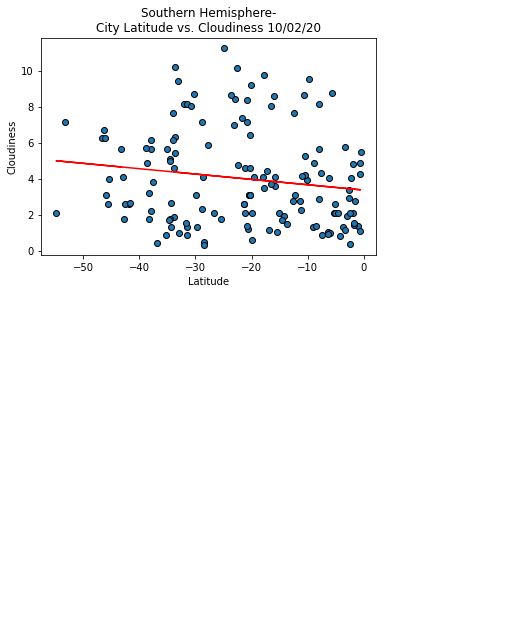

In [25]:
make_lin_reg_plot(south_weather["latitude"],south_weather["cloudiness"],\
                  
                  'Latitude','Cloudiness','Southern Hemisphere',\
                  
                 'SouthernCloudinessLat.png',6,-20)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03800238592150114
y = 0.07x + 54.2


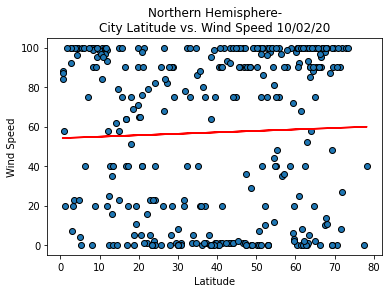

In [26]:
make_lin_reg_plot(north_weather["latitude"],north_weather["wind_speed"],\
                  
                  'Latitude','Wind Speed','Northern Hemisphere',\
                  
                 'NorthernWindLat.png',6,-20)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07492176888727939
y = 0.22x + 52.12


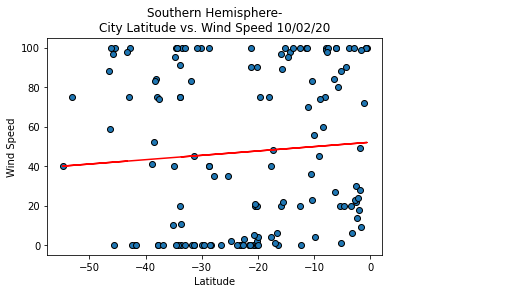

In [27]:
make_lin_reg_plot(south_weather["latitude"],south_weather["wind_speed"],\
                  
                  'Latitude','Wind Speed','Southern Hemisphere',\
                  
                 'SouthernWindLat.png',6,-20)